<a href="https://colab.research.google.com/github/Dannais/Old-Car-Price-Prediction/blob/main/Old_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
# Importar las bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
# Cargar el conjunto de datos
filename = '/content/drive/MyDrive/Cursos Data Science/Coding Dojo/2. Machine Learning/0. Fuente de Datos/car_price.csv'
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


# **Detalle de la fuente de datos**

**1) Fuente de datos**

Se obtuvo la fuente mediante la plataforma Kaggle.

Fuente: https://www.kaggle.com/datasets/milanvaddoriya/old-car-price-prediction

**2) Breve descripción de datos**

La fuente de datos contiene información a detalle de carros antiguos y su precio respectivo.

**3) ¿Cuál es el objetivo?**

* Analizar los datos de investigación.
* Entrenar la fuente para obtener resultados valiosos

**4) ¿Este es un problema de clasificación o regresión?**

Es un problema de regresión, ya que necesitamos predecir los precios de los carros antiguos

**5) ¿Cuántas características hay?**

Hay 9 características. 

**6) ¿Cuántas filas de datos hay?**

Hay 5512 filas

**7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?**

Se va a tener que eliminar las medidas estándar de los campos como, por ejemplo, 'kms' del campo kms_driven.


# **Limpieza de Datos**

## Eliminación de las columnas innecesarias

In [3]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


## Revisión de existencias de filas duplicadas

In [4]:
df.duplicated().sum()

76

In [5]:
# Eliminación de las filas duplicadas
df = df.drop_duplicates()
df.duplicated().sum()

0

## Identificación de valores faltantes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5436 non-null   object
 1   car_prices_in_rupee  5436 non-null   object
 2   kms_driven           5436 non-null   object
 3   fuel_type            5436 non-null   object
 4   transmission         5436 non-null   object
 5   ownership            5436 non-null   object
 6   manufacture          5436 non-null   int64 
 7   engine               5436 non-null   object
 8   Seats                5436 non-null   object
dtypes: int64(1), object(8)
memory usage: 424.7+ KB


> No hay datos faltantes en la fuente de datos para ningún campo

## Identificación y corrección de las inconsistencias en los datos para los valores categóricos

In [7]:
# Revisión del campo 'transmission'
df['transmission'].value_counts()

Manual       3919
Automatic    1517
Name: transmission, dtype: int64

In [8]:
# Revisión del campo 'fuel_type'
df['fuel_type'].value_counts()

Petrol      2933
Diesel      2381
Cng           80
Lpg           28
Electric      14
Name: fuel_type, dtype: int64

In [9]:
# Revisión del campo 'ownership'
df['ownership'].value_counts()

1st Owner    3678
2nd Owner    1298
3rd Owner     358
4th Owner      84
5th Owner      12
0th Owner       6
Name: ownership, dtype: int64

In [10]:
# Revisión del campo 'Seats'
df['Seats'].value_counts()

5 Seats    4603
7 Seats     626
4 Seats      88
6 Seats      60
8 Seats      54
2 Seats       5
Name: Seats, dtype: int64

> Los campos categóricos de la fuente no necesitan ser corregidos, ya que ninguno presenta inconsistencias en la data

## Corrección de tipo de Datos


In [11]:
# Cambiar el tipo de datos de 'kms_driven' a númerico
df['kms_driven']=df['kms_driven'].str.replace('kms','')
df['kms_driven']=df['kms_driven'].str.replace(',','')
df['kms_driven'] = df['kms_driven'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5436 non-null   object
 1   car_prices_in_rupee  5436 non-null   object
 2   kms_driven           5436 non-null   int64 
 3   fuel_type            5436 non-null   object
 4   transmission         5436 non-null   object
 5   ownership            5436 non-null   object
 6   manufacture          5436 non-null   int64 
 7   engine               5436 non-null   object
 8   Seats                5436 non-null   object
dtypes: int64(2), object(7)
memory usage: 424.7+ KB


In [12]:
# Cambiar el tipo de datos de 'engine' a númerico
df['engine']=df['engine'].str.replace('cc','')
df['engine'] = df['engine'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5436 non-null   object
 1   car_prices_in_rupee  5436 non-null   object
 2   kms_driven           5436 non-null   int64 
 3   fuel_type            5436 non-null   object
 4   transmission         5436 non-null   object
 5   ownership            5436 non-null   object
 6   manufacture          5436 non-null   int64 
 7   engine               5436 non-null   int64 
 8   Seats                5436 non-null   object
dtypes: int64(3), object(6)
memory usage: 424.7+ KB


In [13]:
# Cambiar el tipo de datos de 'ownership' a númerico
df['ownership']=df['ownership'].str.replace('Owner','')
df['ownership']=df['ownership'].str.replace('st','')
df['ownership']=df['ownership'].str.replace('nd','')
df['ownership']=df['ownership'].str.replace('rd','')
df['ownership']=df['ownership'].str.replace('th','')
df['ownership'] = df['ownership'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5436 non-null   object
 1   car_prices_in_rupee  5436 non-null   object
 2   kms_driven           5436 non-null   int64 
 3   fuel_type            5436 non-null   object
 4   transmission         5436 non-null   object
 5   ownership            5436 non-null   int64 
 6   manufacture          5436 non-null   int64 
 7   engine               5436 non-null   int64 
 8   Seats                5436 non-null   object
dtypes: int64(4), object(5)
memory usage: 424.7+ KB


In [14]:
# Cambiar el tipo de datos de 'car_prices_in_rupee' a númerico

## Separar campos por el valor del precios y la moneda
car_prices_in_rupee = df["car_prices_in_rupee"].str.split(expand=True)
car_prices_in_rupee.columns = ['price', 'moneda']

## Añadir estos campos al df
df = pd.concat([car_prices_in_rupee, df], axis=1)

## Reemplazar los valores nulos de la columna 'moneda' con 'Rupee'
df['moneda'].fillna('Rupee',inplace = True)

## Reemplazar caracteres
df['price'] = df['price'].str.replace(',','')

## Cambiar el tipo de datos del campo 'price'
df['price'] = df['price'].astype(float)

df.head()

,price,moneda,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,10.03,Lakh,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,86226,Diesel,Manual,1,2017,1956,5 Seats
1,12.83,Lakh,Renault Duster RXZ Turbo CVT,12.83 Lakh,13248,Petrol,Automatic,1,2021,1330,5 Seats
2,16.40,Lakh,Toyota Camry 2.5 G,16.40 Lakh,60343,Petrol,Automatic,1,2016,2494,5 Seats
3,7.77,Lakh,Honda Jazz VX CVT,7.77 Lakh,26696,Petrol,Automatic,1,2018,1199,5 Seats
4,5.15,Lakh,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,69414,Petrol,Manual,1,2016,1199,5 Seats


In [15]:
## Revisión de los datos en el campo 'Moneda'
df['moneda'].value_counts()

Lakh     5258
Rupee     123
Crore      55
Name: moneda, dtype: int64

In [16]:
## Crear variables para la conversion
## Conversiones
moneda = [
    (df['moneda']=='Lakh'),
    (df['moneda']=='Rupee'),
    (df['moneda']=='Crore')
]
Conversiones =[100000,1,10000000]

## Crear una nueva columna de las conversiones por tipo de moneda
df['Conversion'] = np.select(moneda, Conversiones)
df['Conversion'].value_counts()

100000      5258
1            123
10000000      55
Name: Conversion, dtype: int64

In [17]:
## Multiplicación del campo 'price' y su respectiva conversion por moneda
df['car_prices_in_rupee'] = df['price'] * df['Conversion']
df.head()

,price,moneda,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Conversion
0,10.03,Lakh,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1,2017,1956,5 Seats,100000
1,12.83,Lakh,Renault Duster RXZ Turbo CVT,1283000.0,13248,Petrol,Automatic,1,2021,1330,5 Seats,100000
2,16.40,Lakh,Toyota Camry 2.5 G,1640000.0,60343,Petrol,Automatic,1,2016,2494,5 Seats,100000
3,7.77,Lakh,Honda Jazz VX CVT,777000.0,26696,Petrol,Automatic,1,2018,1199,5 Seats,100000
4,5.15,Lakh,Volkswagen Polo 1.2 MPI Highline,515000.0,69414,Petrol,Manual,1,2016,1199,5 Seats,100000


In [18]:
## Eliminar campos creados innecesarios
df = df.drop(columns=['price','moneda','Conversion'])
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1,2017,1956,5 Seats
1,Renault Duster RXZ Turbo CVT,1283000.0,13248,Petrol,Automatic,1,2021,1330,5 Seats
2,Toyota Camry 2.5 G,1640000.0,60343,Petrol,Automatic,1,2016,2494,5 Seats
3,Honda Jazz VX CVT,777000.0,26696,Petrol,Automatic,1,2018,1199,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,515000.0,69414,Petrol,Manual,1,2016,1199,5 Seats


In [19]:
# Cambiar el tipo de datos de 'Seats' a númerico
df['Seats']=df['Seats'].str.replace('Seats','')
df['Seats'] = df['Seats'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5436 non-null   object 
 1   car_prices_in_rupee  5436 non-null   float64
 2   kms_driven           5436 non-null   int64  
 3   fuel_type            5436 non-null   object 
 4   transmission         5436 non-null   object 
 5   ownership            5436 non-null   int64  
 6   manufacture          5436 non-null   int64  
 7   engine               5436 non-null   int64  
 8   Seats                5436 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 424.7+ KB


# Exploración de datos

Producir visuales univariantes para el objetivo y todas las características

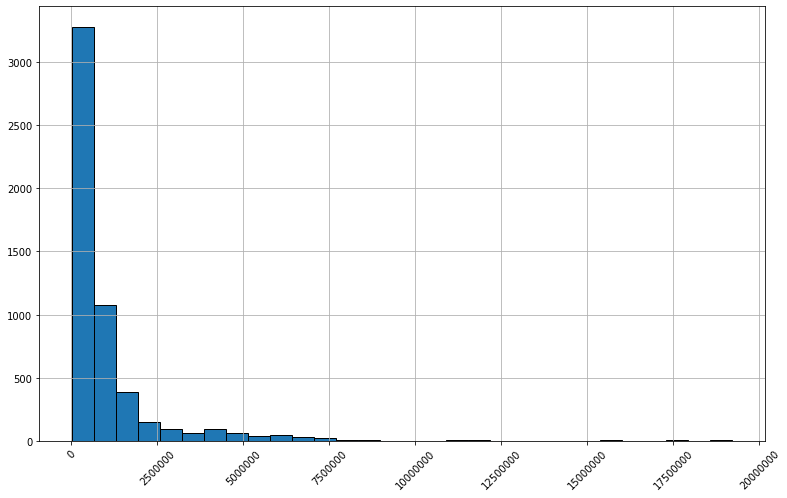

In [27]:
# Histograma de precios
plt.figure(figsize=[13,8])
df['car_prices_in_rupee'].hist(bins = 30,
                               edgecolor = 'black')

plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation = 45)
plt.show()

>Podemos observar que la mayor cantidad de datos de los precios de autos antiguos son menores que 2,500,000 rupias.

Tendencia del precio promedio por año manufacturado

In [43]:
# Precio promedio por año manufacturado
price_manufactureYear = df.groupby(['manufacture'])['car_prices_in_rupee'].mean()
price_manufactureYear

manufacture
1995    2.600000e+05
1998    8.500000e+04
1999    3.500000e+04
2000    4.725000e+04
2001    1.275000e+05
2002    1.303077e+05
2003    9.467162e+04
2004    1.600000e+05
2005    1.472335e+05
2006    1.793266e+05
2007    2.065699e+05
2008    1.600935e+05
2009    1.990563e+05
2010    2.764685e+05
2011    3.737840e+05
2012    4.172893e+05
2013    5.933659e+05
2014    6.914497e+05
2015    8.099363e+05
2016    9.599041e+05
2017    1.180891e+06
2018    1.452321e+06
2019    2.210981e+06
2020    2.295810e+06
2021    2.378293e+06
2022    2.608803e+06
Name: car_prices_in_rupee, dtype: float64

In [44]:
manufactureYears = list(price_manufactureYear.index)
manufactureYears

[1995,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [45]:
price_prom = list(price_manufactureYear.values)
price_prom

[260000.0,
 85000.0,
 35000.0,
 47250.0,
 127500.0,
 130307.69230769231,
 94671.625,
 160000.0,
 147233.4642857143,
 179326.61904761905,
 206569.93333333332,
 160093.45132743364,
 199056.3409090909,
 276468.50230414746,
 373783.9612403101,
 417289.2976588629,
 593365.8505434783,
 691449.6783369803,
 809936.3141762452,
 959904.1394335512,
 1180891.4473684211,
 1452321.083172147,
 2210981.4814814813,
 2295810.495626822,
 2378292.899408284,
 2608802.8169014086]

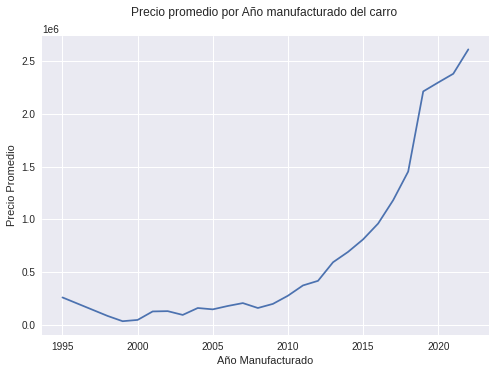

In [48]:
plt.style.use('seaborn')
plt.plot(manufactureYears, price_prom)
plt.xlabel('Año Manufacturado')
plt.ylabel('Precio Promedio')
plt.title('Precio promedio por Año manufacturado del carro \n')
plt.show()

> Hay una tendencia incremental del promedio del precio de los autos. Mientras más nuevo sea el carro mantiene un mayor precio que el resto 

Revisión de Outliers

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


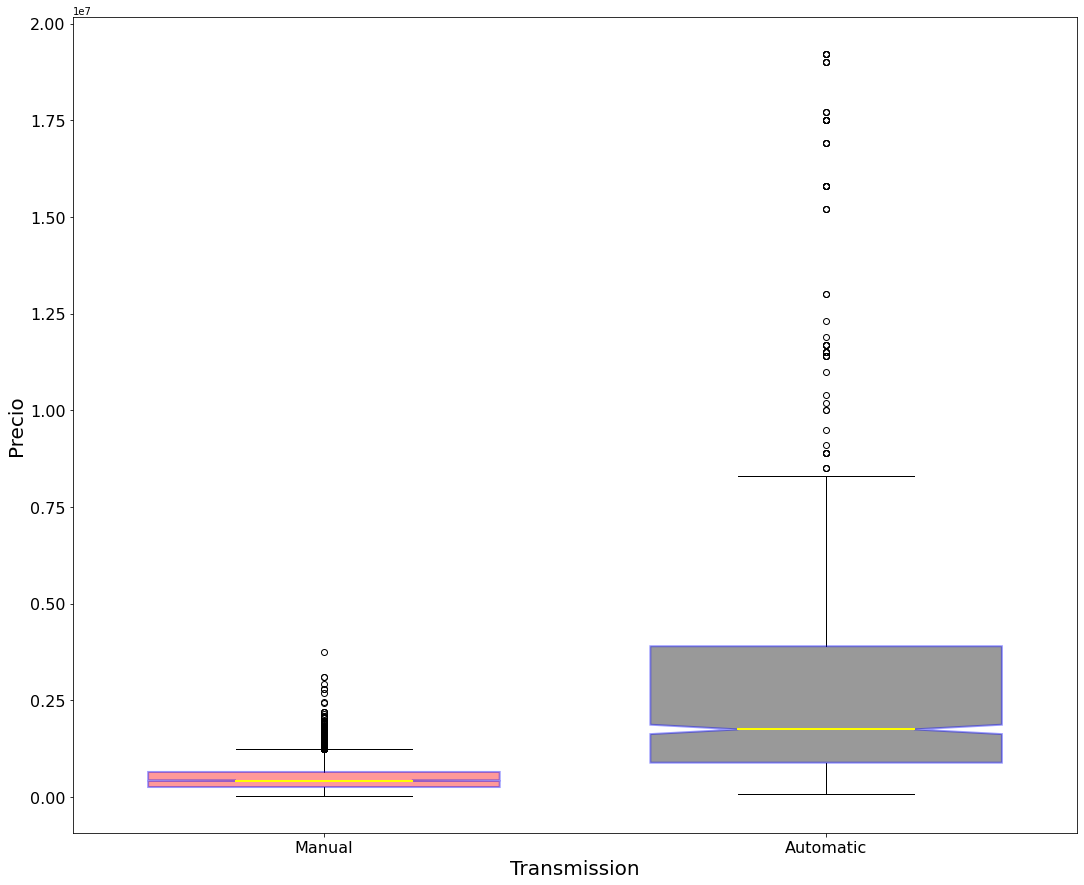

In [36]:
malignant = df.loc[df['transmission']=='Manual','car_prices_in_rupee']
benign = df.loc[df['transmission']=='Automatic','car_prices_in_rupee']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (18,15))
boxplots = axes.boxplot([malignant,benign],
           notch = True,
           labels=['Manual', 'Automatic'],
           widths = .7, 
           patch_artist=True, 
           medianprops = dict(linestyle='-',
                              linewidth=2, 
                              color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='blue', facecolor = 'black', alpha = .4)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('Transmission', fontsize = 20)
plt.ylabel('Precio', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

> De acuerdo con la gráfica, tenemos varios precios por encima de la gráfica como datos átipicos, es decir, que son precios muy elevados frente a la mayoría de datos

Gráfica de correlación

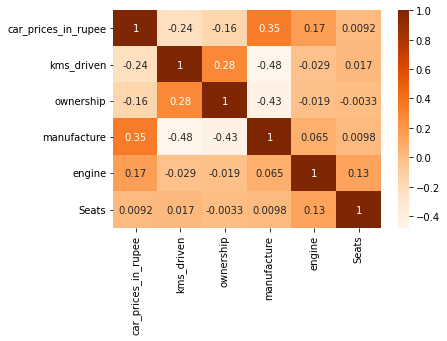

In [32]:
corr = df.corr()
sns.heatmap(corr, 
            cmap = 'Oranges',
            annot = True
            )
plt.show()

>Según el gráfico tenemos que mientras tenga mayor cantidad de dueños, el kilometraje del auto es mayor.
>
>También, se observa que hay una fuerte correlación entre el precio del carro y el año que se ha manufacturado el carro.
